---
title: "Project Step II"
subtitle: "Group 11 - Exploratory Data Analysis"
date: 10/17/2023
date-modified: last-modified
date-format: long
format:
  html:
    theme: [cosmo, theme.scss]
    toc: true
    embed-resources: true
    number-sections: true
author:
  - name: Tegveer Ghura
    affiliations:
      - id: gu
        name: Georgetown University
        city: Washington
        state: DC
---

# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from seaborn.palettes import color_palette

# Load Cleaned Data

In [2]:
df = pd.read_csv("data/clean/deliveries_clean.csv")

In [3]:
df.head()

,season,match_type,venue,inning,batting_team,bowling_team,batsman,non_striker,bowler_type,ball,wickets,ball_length,cumulative_runs,event
0,2008,round-robin,Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,top,top,pacer,0.1,0,full,1,Extras
1,2008,round-robin,Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,top,top,pacer,0.2,0,good,1,Dot
2,2008,round-robin,Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,top,top,pacer,0.3,0,Unknown,2,Extras
3,2008,round-robin,Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,top,top,pacer,0.3,0,Unknown,2,Dot
4,2008,round-robin,Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,top,top,pacer,0.4,0,good,2,Dot


## Tournament-Level Plots

### Total Runs Scored

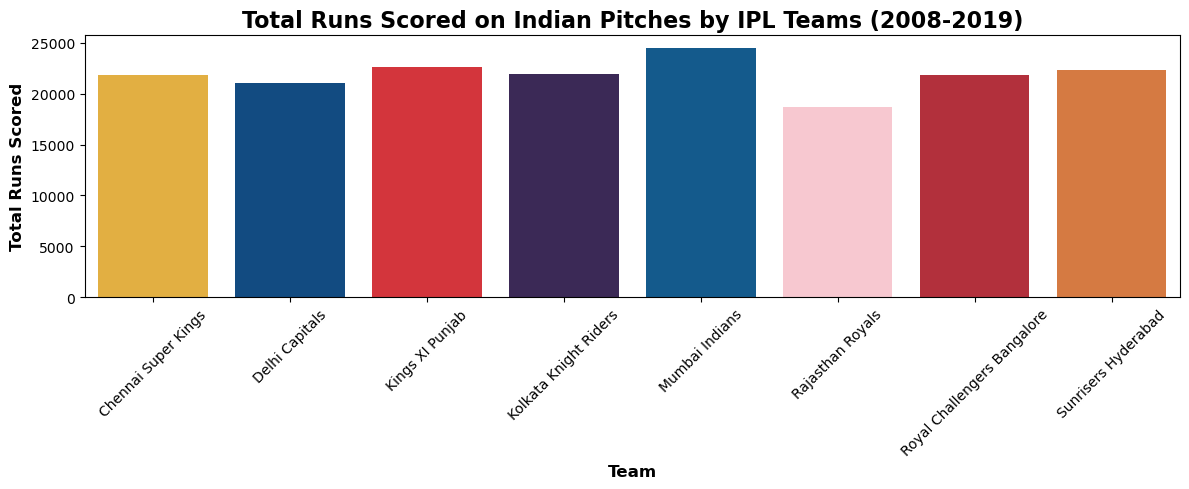

In [73]:
team_colors = {
    "Chennai Super Kings": "#fdb927",  # Yellow for CSK
    "Delhi Capitals": "#004c93",  # Blue for DD
    "Kings XI Punjab": "#ed1b24",  # Red for KXIP
    "Kolkata Knight Riders": "#3A225D",  # Purple for KKR
    "Mumbai Indians": "#005da0",  # Blue for Mumbai Indians
    "Rajasthan Royals": "pink",  # Pink for RR
    "Royal Challengers Bangalore": "#c81a2b",  # Red for RCB
    "Sunrisers Hyderabad": "#EE7429",  # Orange for SRH
}

# Calculate raw total_runs from cumulative_runs
df["total_runs"] = df.groupby(
    ["season", "match_type", "venue", "inning", "batting_team", "bowling_team"]
)["cumulative_runs"].diff()

# Calculate total runs scored by each team
total_runs_by_team = df.groupby("batting_team")["total_runs"].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 5))
sns.barplot(
    x="batting_team",
    y="total_runs",
    data=total_runs_by_team,
    palette=[team_colors[team] for team in sorted(df.batting_team.unique())],
)
plt.xlabel("Team", fontsize=12, fontweight="bold")
plt.ylabel("Total Runs Scored", fontsize=12, fontweight="bold")
plt.title(
    "Total Runs Scored on Indian Pitches by IPL Teams (2008-2019)",
    fontsize=16,
    fontweight="bold",
)
plt.xticks(rotation=45)
# Adjust the layout to prevent cutoff of labels
plt.tight_layout()
plt.savefig("products/plots/eda_total_runs_by_team.jpeg", dpi=300)
plt.show()

### Total Wickets Taken

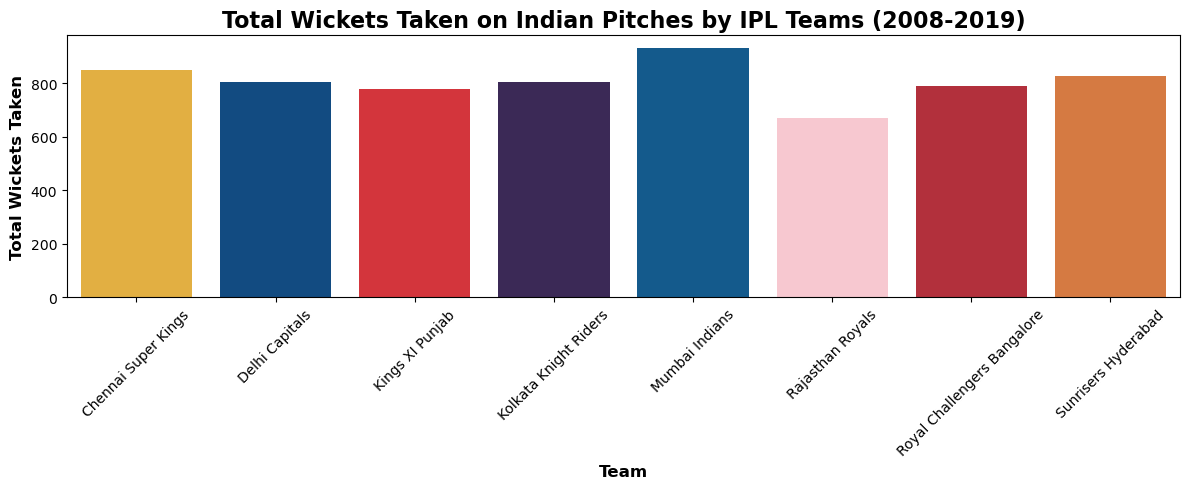

In [44]:
# Filter rows where the event is 'Wickets'
wickets_data = df[df["event"] == "WICKET!"]

# Group data by 'bowling_team' and count occurrences of 'Wickets' event
wickets_by_team = wickets_data.groupby("bowling_team")["event"].count().reset_index()

# Rename the columns for clarity
wickets_by_team.columns = ["Team", "Wickets"]

# Create a bar plot for total number of wickets taken by each team
plt.figure(figsize=(12, 5))
sns.barplot(
    x="Team",
    y="Wickets",
    data=wickets_by_team,
    palette=[team_colors[team] for team in sorted(df.bowling_team.unique())],
)
plt.xlabel("Team", fontsize=12, fontweight="bold")
plt.ylabel("Total Wickets Taken", fontsize=12, fontweight="bold")
plt.title(
    "Total Wickets Taken on Indian Pitches by IPL Teams (2008-2019)",
    fontsize=16,
    fontweight="bold",
)
plt.xticks(rotation=45)
# Adjust the layout to prevent cutoff of labels
plt.tight_layout()
plt.savefig("products/plots/eda_total_wickets_by_team.jpeg", dpi=300)
plt.show()

## Batting Innings (First) Progression of Top 4 Most Runs Scored Teams 

/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/Tegveer/miniforge

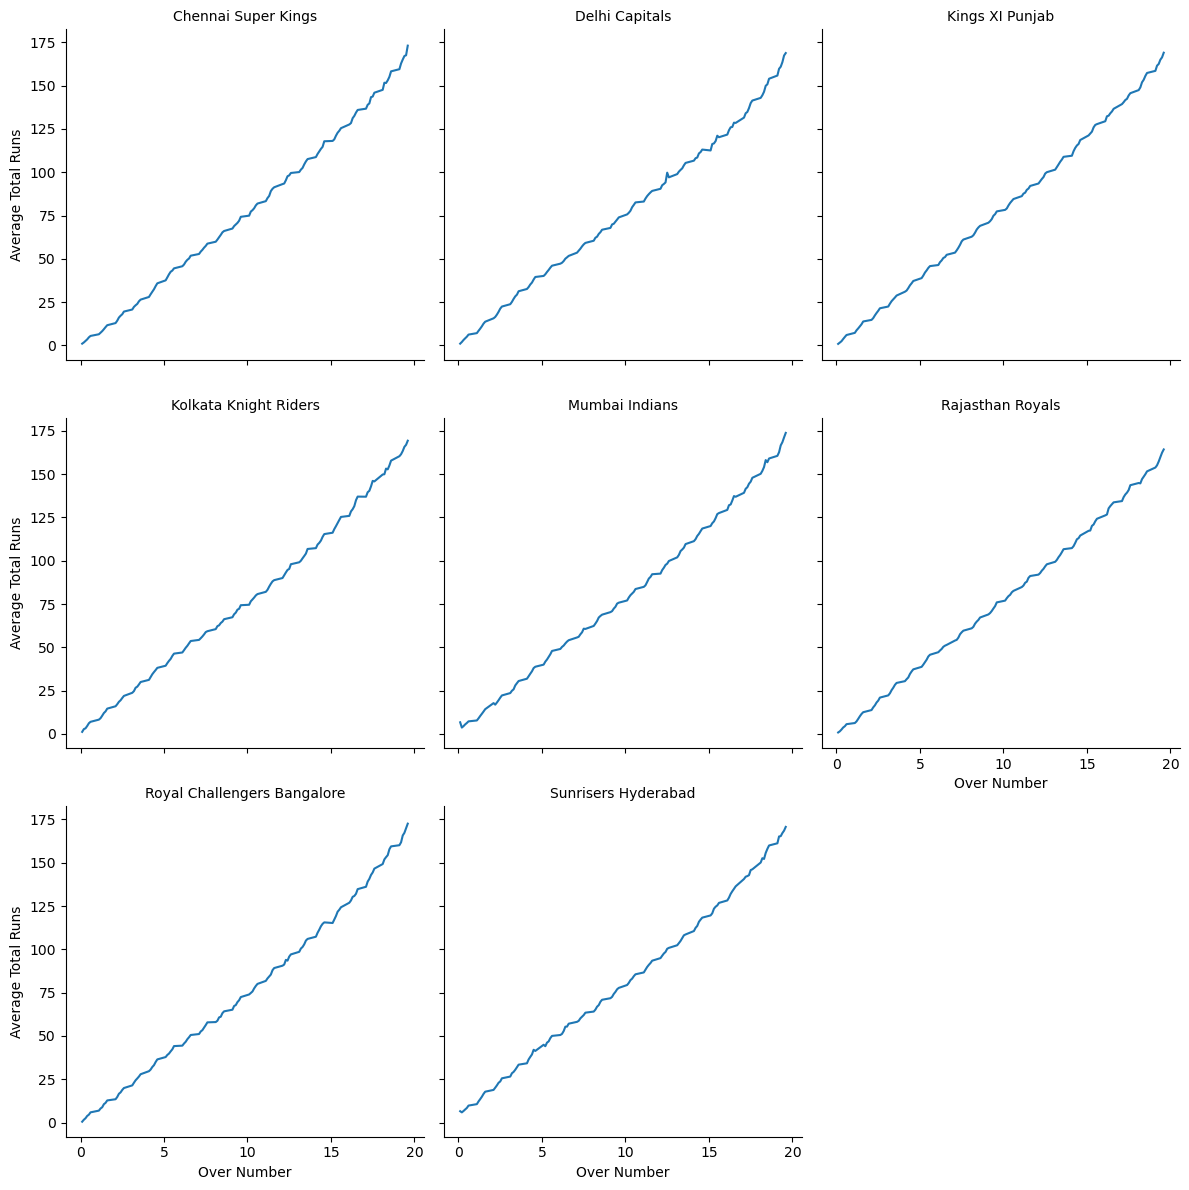

In [65]:
# Calculate average total runs scored per ball for each team
avg_runs_per_ball = (
    df.groupby(["batting_team", "inning", "ball"])["cumulative_runs"]
    .mean()
    .reset_index()
)

# Filter data for specific teams
# selected_teams = ['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab', 'Sunrisers Hyderabad']
avg_runs_per_ball = avg_runs_per_ball.loc[
    (avg_runs_per_ball.inning == 1) & (avg_runs_per_ball.ball != 18.7)
]

# Create faceted line plot
g = sns.FacetGrid(avg_runs_per_ball, col="batting_team", col_wrap=3, height=4)
g.map(sns.lineplot, "ball", "cumulative_runs")
g.set_axis_labels("Over Number", "Average Total Runs")
g.set_titles(col_template="{col_name}")

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()

## Total Runs Scored By Batting Position

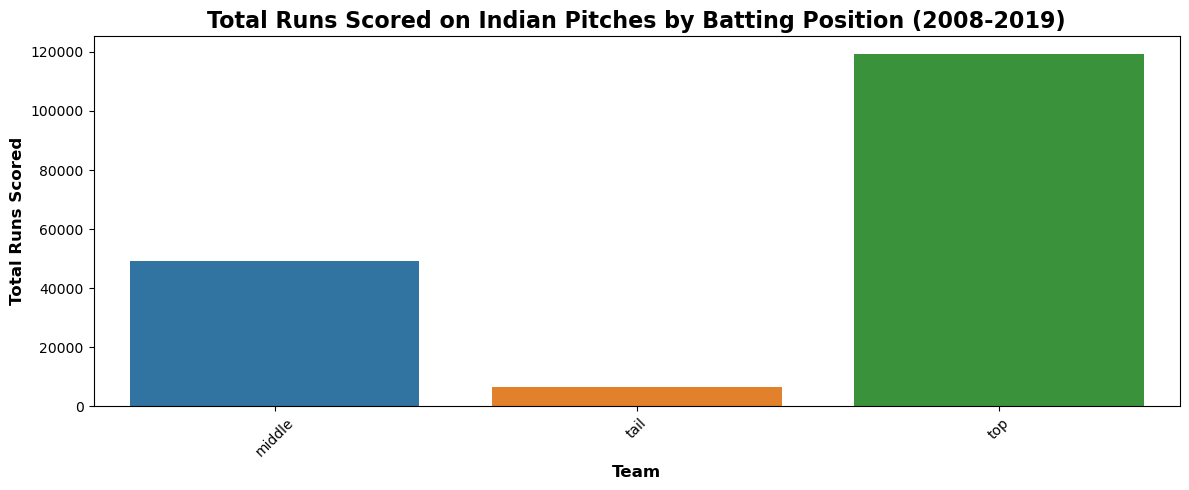

In [74]:
# Calculate raw total_runs from cumulative_runs

# Calculate total runs scored by each team
total_runs_by_batting_posn = df.groupby("batsman")["total_runs"].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 5))
sns.barplot(x="batsman", y="total_runs", data=total_runs_by_batting_posn)
plt.xlabel("Team", fontsize=12, fontweight="bold")
plt.ylabel("Total Runs Scored", fontsize=12, fontweight="bold")
plt.title(
    "Total Runs Scored on Indian Pitches by Batting Position (2008-2019)",
    fontsize=16,
    fontweight="bold",
)
plt.xticks(rotation=45)
# Adjust the layout to prevent cutoff of labels
plt.tight_layout()
plt.savefig("products/plots/eda_total_runs_by_batting_posn.jpeg", dpi=300)
plt.show()